In [1]:
# import os
# os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd  

import utils_for_Evaluation_of_Diagnostic_Models as util

In [2]:
train_results = pd.read_csv("data/evaluation/train_preds.csv")
valid_results = pd.read_csv("data/evaluation/valid_preds.csv")

# the labels in our dataset
class_labels = ['Cardiomegaly',
 'Emphysema',
 'Effusion',
 'Hernia',
 'Infiltration',
 'Mass',
 'Nodule',
 'Atelectasis',
 'Pneumothorax',
 'Pleural_Thickening',
 'Pneumonia',
 'Fibrosis',
 'Edema',
 'Consolidation']

# the labels for prediction values in our dataset
pred_labels = [l + "_pred" for l in class_labels]

In [3]:
y = valid_results[class_labels].values
pred = valid_results[pred_labels].values

In [4]:
# let's take a peek at our dataset
valid_results[np.concatenate([class_labels, pred_labels])].head()

,Cardiomegaly,Emphysema,Effusion,Hernia,Infiltration,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,...,Infiltration_pred,Mass_pred,Nodule_pred,Atelectasis_pred,Pneumothorax_pred,Pleural_Thickening_pred,Pneumonia_pred,Fibrosis_pred,Edema_pred,Consolidation_pred
0,0,0,0,0,0,0,0,0,0,0,...,0.256020,0.266928,0.312440,0.460342,0.079453,0.271495,0.276861,0.398799,0.015867,0.156320
1,0,0,0,0,1,0,1,0,0,0,...,0.382199,0.176825,0.465807,0.489424,0.084595,0.377317,0.363582,0.638024,0.025948,0.144419
2,0,0,0,0,0,0,0,0,0,0,...,0.427727,0.115513,0.249030,0.035105,0.238761,0.167095,0.166389,0.262463,0.007758,0.125790
3,0,0,0,0,0,0,0,0,0,0,...,0.158596,0.259460,0.334870,0.266489,0.073371,0.229834,0.191281,0.344348,0.008559,0.119153
4,0,0,0,0,0,0,0,0,0,0,...,0.536762,0.198797,0.273110,0.186771,0.242122,0.309786,0.411771,0.244666,0.126930,0.342409


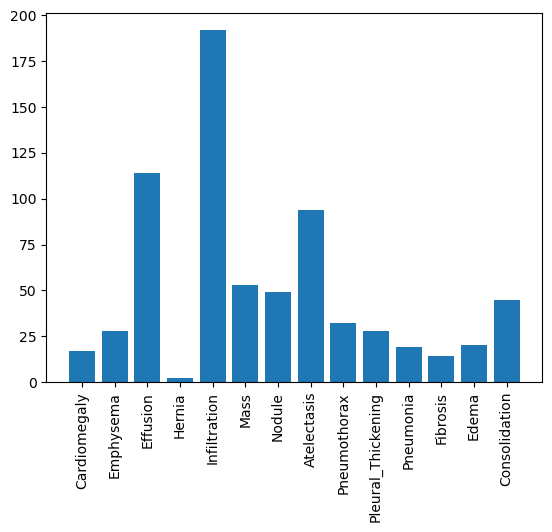

In [5]:
plt.xticks(rotation=90)
plt.bar(x = class_labels, height= y.sum(axis=0));

In [6]:
# UNQ_C1 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def true_positives(y, pred, th=0.5):
    """
    Count true positives.

    Args:
        y (np.array): ground truth, size (n_examples)
        pred (np.array): model output, size (n_examples)
        th (float): cutoff value for positive prediction from model
    Returns:
        TP (int): true positives
    """
    TP = 0
    
    # get thresholded predictions
    thresholded_preds = pred >= th

    # compute TP
    TP = np.sum((y == 1) & (thresholded_preds == 1))
    
    return TP

def true_negatives(y, pred, th=0.5):
    """
    Count true negatives.

    Args:
        y (np.array): ground truth, size (n_examples)
        pred (np.array): model output, size (n_examples)
        th (float): cutoff value for positive prediction from model
    Returns:
        TN (int): true negatives
    """
    TN = 0
    
    # get thresholded predictions
    thresholded_preds = pred >= th

    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # compute TN
    TN = np.sum((y == 0 ) & (thresholded_preds == 0 ))
    
    ### END CODE HERE ###
    
    return TN

def false_positives(y, pred, th=0.5):
    """
    Count false positives.

    Args:
        y (np.array): ground truth, size (n_examples)
        pred (np.array): model output, size (n_examples)
        th (float): cutoff value for positive prediction from model
    Returns:
        FP (int): false positives
    """
    FP = 0
    
    # get thresholded predictions
    thresholded_preds = pred >= th
    
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###

    # compute FP
    FP = np.sum((y == 0) & (thresholded_preds == 1))
    
    ### END CODE HERE ###
    
    return FP

def false_negatives(y, pred, th=0.5):
    """
    Count false positives.

    Args:
        y (np.array): ground truth, size (n_examples)
        pred (np.array): model output, size (n_examples)
        th (float): cutoff value for positive prediction from model
    Returns:
        FN (int): false negatives
    """
    FN = 0
    
    # get thresholded predictions
    thresholded_preds = pred >= th

    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # compute FN
    FN = np.sum((y == 1) & (thresholded_preds == 0))
    
    ### END CODE HERE ###
    
    return FN

In [7]:
# Note: we must explicity import 'display' in order for the autograder to compile the submitted code
# Even though we could use this function without importing it, keep this import in order to allow the grader to work
from IPython.display import display
# Test
df = pd.DataFrame({'y_test': [1,1,0,0,0,0,0,0,0,1,1,1,1,1],
                   'preds_test': [0.8,0.7,0.4,0.3,0.2,0.5,0.6,0.7,0.8,0.1,0.2,0.3,0.4,0],
                   'category': ['TP','TP','TN','TN','TN','FP','FP','FP','FP','FN','FN','FN','FN','FN']
                  })

display(df)
#y_test = np.array([1, 0, 0, 1, 1])
y_test = df['y_test']

#preds_test = np.array([0.8, 0.8, 0.4, 0.6, 0.3])
preds_test = df['preds_test']

threshold = 0.5
print(f"threshold: {threshold}\n")

print(f"""Our functions calculated: 
TP: {true_positives(y_test, preds_test, threshold)}
TN: {true_negatives(y_test, preds_test, threshold)}
FP: {false_positives(y_test, preds_test, threshold)}
FN: {false_negatives(y_test, preds_test, threshold)}
""")

print("Expected results")
print(f"There are {sum(df['category'] == 'TP')} TP")
print(f"There are {sum(df['category'] == 'TN')} TN")
print(f"There are {sum(df['category'] == 'FP')} FP")
print(f"There are {sum(df['category'] == 'FN')} FN")

,y_test,preds_test,category
0,1,0.8,TP
1,1,0.7,TP
2,0,0.4,TN
3,0,0.3,TN
4,0,0.2,TN
5,0,0.5,FP
6,0,0.6,FP
7,0,0.7,FP
8,0,0.8,FP
9,1,0.1,FN


threshold: 0.5

Our functions calculated: 
TP: 2
TN: 3
FP: 4
FN: 5

Expected results
There are 2 TP
There are 3 TN
There are 4 FP
There are 5 FN


In [8]:
util.get_performance_metrics(y, pred, class_labels)

D:\Code\pythonProject\mycode\pythonNet\pytorch\ai_for_medicine\diagnosis\utils_for_Evaluation_of_Diagnostic_Models.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[i][0] = class_labels[i]
D:\Code\pythonProject\mycode\pythonNet\pytorch\ai_for_medicine\diagnosis\utils_for_Evaluation_of_Diagnostic_Models.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[i][1] = round(tp(y[:, i], pred[:, i]),
D:\Code\pythonProject\mycode\pythonNet\pytorch\ai_for_medicine\diagnosis\utils_for_Evaluation_of_Diagnostic_Models.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


,TP,TN,FP,FN,Accuracy,Prevalence,Sensitivity,Specificity,PPV,NPV,AUC,F1,Threshold
,,,,,,,,,,,,,
,0,0,0,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0,0,0,0
